In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# to display all columns
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Key Takeaways:
###### SeniorCitizens column is marked as an integer. one of the only binary classification rows to be marked as such.
###### TotalCharges is marked as a 'non-null object' and should be a float64

In [8]:
print(df['PaymentMethod'].dtype)
print(df['MonthlyCharges'].dtype)
print(df['SeniorCitizen'].dtype)

object
float64
int64


In [9]:
def preliminary_research(df):
    for col in df.columns:
        unique_vals = df[col].unique()
        if len(unique_vals) < 10:
            print("Unique values for column {}: {}".format(col, unique_vals))
        else:
            if df[col].dtype == 'object':
                print("column {} has values string type".format(col))
            elif df[col].dtype == 'int64':
                print("column {} is numerical".format(col))
            elif df[col].dtype == 'float64':
                print("column {} is numerical".format(col))

In [10]:
preliminary_research(df)

column customerID has values string type
Unique values for column gender: ['Female' 'Male']
Unique values for column SeniorCitizen: [0 1]
Unique values for column Partner: ['Yes' 'No']
Unique values for column Dependents: ['No' 'Yes']
column tenure is numerical
Unique values for column PhoneService: ['No' 'Yes']
Unique values for column MultipleLines: ['No phone service' 'No' 'Yes']
Unique values for column InternetService: ['DSL' 'Fiber optic' 'No']
Unique values for column OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values for column OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values for column DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values for column TechSupport: ['No' 'Yes' 'No internet service']
Unique values for column StreamingTV: ['No' 'Yes' 'No internet service']
Unique values for column StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values for column Contract: ['Month-to-month' 'One year' 'Two year']
Unique values for 

In [11]:
# Looking into TotalCharges, which has a value string type for some strange reason
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

##### customerID: ID numbers, which have no impact on churn

##### gender is binary
male or female

##### SeniorCitizen is binary
0 - no
1 -yes

##### Partner is binary
Yes - customer has a partner
No - customer do not have a partner

##### Dependents is binary
Yes - customer has dependents
No - customer do not have dependents

##### tenure is numerical
Represents how long the customer have been using the service

##### PhoneService is binary
Yes - customer has phone service with company
no - customer do not have phone service with company

##### MultipleLines is categorical
Yes - customer has multiple line subscriptions
No - customer has only 1 line subscription
No phone service - customer do not have phone service with company

##### InternetService is categorical
DSL
Fiber optic
No - customer do not have internet service with company

##### OnlineSecurity is categorical
Yes - customer has online security with company
No - customer do not have online security with company
No internet service - customer do not have internet service with company

##### OnlineBackup is categorical
Yes - customer has online backup with company
No - customer do not have online backup with company
No internet service - customer do not have internet service with company

##### DeviceProtection is categorical
Yes - customer has device protection with company
No - customer do not have device protection with company
No internet service - customer do not have internet service with company

##### TechSupport is categorical
Yes - customer has technical support with company
No - customer do not have technical support with company
No internet service - customer do not have internet service with company

##### StreamingTV is categorical
Yes - customer has streaming TV service with company
No - customer do not have streaming TV service with company
No internet service - customer do not have internet service with company

##### StreamingMovies is categorical
Yes - customer has streaming movies service with company
No - customer do not have streaming movies with company
No internet service - customer do not have internet service with company

##### Contract is categorical
Month-to-month - customer is on a no-commitment plan
One year - customer is on a 1-year contract commitment
Two year - customer is on a 2-year contract commitment

##### PaperlessBilling is binary
Yes - only receives bills via email
No - receives letters in mail with bill

##### PaymentMethod is categorical 
Electronic check
Mailed check
Bank transfer (automatic)
Credit card (automatic)

##### MonthlyCharges is numerical
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000

##### TotalCharges -- NEEDS ATTENTION
Says that it is a string. However, this should be numerical...

##### Churn is binary
No - customer is still an active customer
Yes - customer has left service

## Work that is cut out for me in the cleaning process:
### 1. change column names to all lowercase and no spaces
### 2. convert all "yes / no" binary options to numerical 0s and 1s
### 3. convert df['totalcharges'] values from objects to a floats
### 4. drop the 'customerid' column
##### Note: No need to deal with missing values yet. Let missing values stay as is for the vanilla model.

In [12]:
# change column names to all lowercase
df.columns = map(str.lower, df.columns)

In [13]:
# convert "yes / no" binary options to numerical 0s and 1s
# binary_columns = ['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']
# df[binary_columns] = df[binary_columns].map({'No':0 ,'Yes':1})

In [14]:
# convert "No / Yes" binary options to numerical 0s and 1s
binary_columns = ['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']
df[binary_columns] = df[binary_columns].eq('Yes').mul(1)

In [15]:
# convert "Male / Female" binary options to numerical 0s and 1s
df['gender'] = df['gender'].eq('Female').mul(1)

In [16]:
# convert df['totalcharges'] values from objects to a floats
df['totalcharges'] = df.totalcharges.astype(float)

ValueError: could not convert string to float: 

###### Notes: Unable to convert to a float. This could be because there are null values. Let's check.

In [17]:
df['totalcharges'].isnull().values.any()

False

###### Notes: Strange. There appear to be none. Let's check if there are any "blank" values.

In [18]:
print(sum(df.totalcharges == ' '))

11


###### Notes: There appear to be 11 blank values. Let's replace them for NaN and then convert column to dtype float.

In [19]:
df['totalcharges'] = df['totalcharges'].replace(' ', np.nan, regex=True) # replaces blank to NaN
df['totalcharges'] = df.totalcharges.astype(float) # converts to float

###### Notes: Drop the 11 rows. Will have very little statistical significance on the model to drop and will make processing and modeling substatially easier.

In [20]:
df = df.dropna()

In [21]:
# drop 'customerid' column.
df = df.drop(columns = 'customerid')

## Run a vanilla model based upon the information given. Use that as a benchmark.


In [22]:
# Class frequency of target variable 
df['churn'].value_counts()

0    5163
1    1869
Name: churn, dtype: int64

In [23]:
# convert all categorical string variables into numerical values using LabelEncoder()
categorical_strings_columns = ['multiplelines', 'internetservice', 'onlinesecurity',
                               'onlinebackup', 'deviceprotection', 'techsupport',
                               'streamingtv', 'streamingmovies', 'contract', 'paymentmethod']

def labelencoder_conversion(df):
    le = preprocessing.LabelEncoder()
    for col in df[categorical_strings_columns]:
        df[col] = le.fit_transform(df[col].values)
    return print('Columns with dtype objects have successfully been encoded as integers.')

labelencoder_conversion(df)

Columns with dtype objects have successfully been encoded as integers.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null int64
seniorcitizen       7032 non-null int64
partner             7032 non-null int64
dependents          7032 non-null int64
tenure              7032 non-null int64
phoneservice        7032 non-null int64
multiplelines       7032 non-null int64
internetservice     7032 non-null int64
onlinesecurity      7032 non-null int64
onlinebackup        7032 non-null int64
deviceprotection    7032 non-null int64
techsupport         7032 non-null int64
streamingtv         7032 non-null int64
streamingmovies     7032 non-null int64
contract            7032 non-null int64
paperlessbilling    7032 non-null int64
paymentmethod       7032 non-null int64
monthlycharges      7032 non-null float64
totalcharges        7032 non-null float64
churn               7032 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


In [25]:
# Create features and labels
X = df.drop('churn', axis=1)  
y = df['churn'] 

In [26]:
# Perform an train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
# ohe = OneHotEncoder()

# ohe.fit(X_train)
# X_train_ohe = ohe.transform(X_train).toarray()

In [28]:
# ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

In [29]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=0, max_depth=4)  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

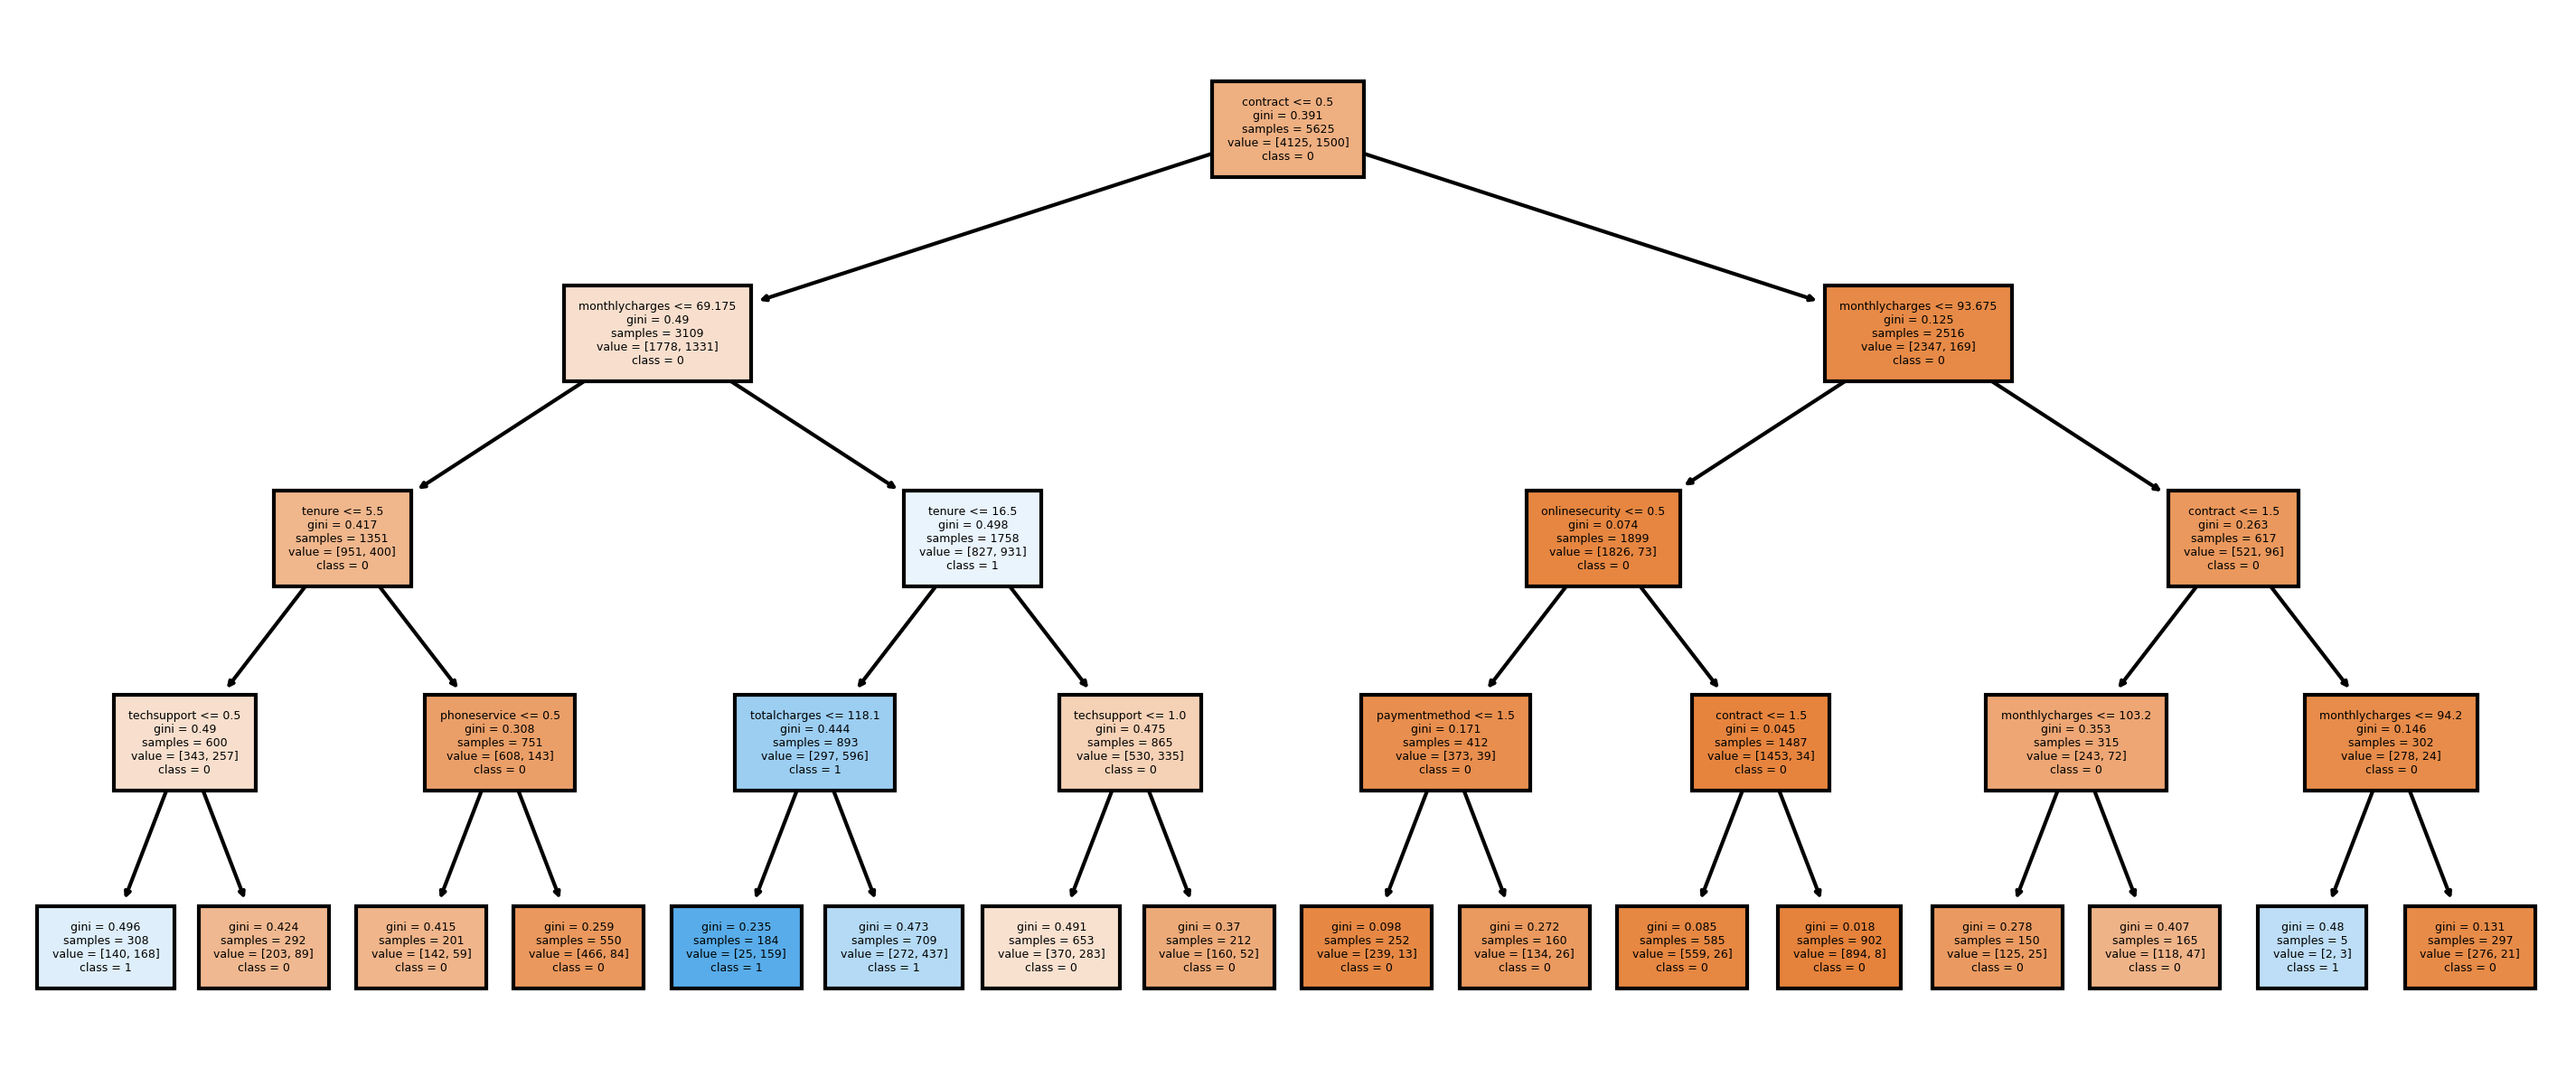

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,5), dpi=300)
tree.plot_tree(classifier, fontsize=3,
               feature_names = df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [31]:
# Make predictions for test data
y_pred = classifier.predict(X_test)  

# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :79.45984363894812

AUC is :0.7

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,936,102,1038
1,187,182,369
All,1123,284,1407


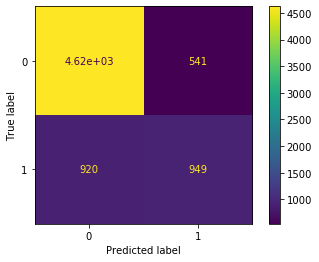

In [32]:
plot_confusion_matrix(classifier, X, y, values_format='.3g')
plt.show()

##### Notes: Beyond accuracy, I think that it would be beneficial to minimize the instances where the model predicts someone who will not churn, but actually leaves the service [churns].

##### Goal: Increase Precision. Reduce Type II errors (i.e. false negatives). We want to be able to identify everyone who will likely churn and prevent them from churning.

## Visualizing Relationships

totalcharges                                                     \
             count         mean          std    min      25%      50%   
churn                                                                   
0           5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
1           1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                          
            75%      max  
churn                     
0      4264.125  8672.45  
1      2331.300  8684.80

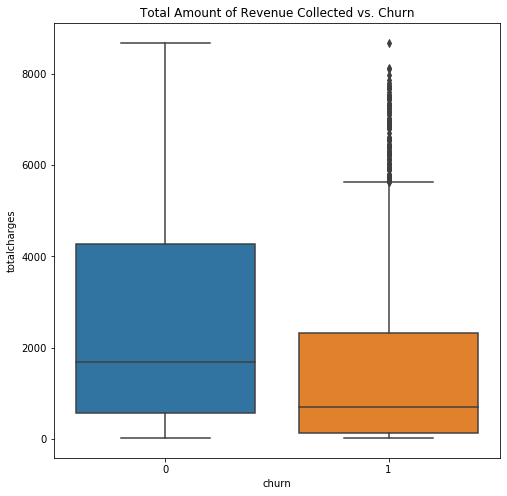

In [33]:
# Looking at the relationship between the total amount of revenue earned and whether or not they churned
plot1 = pd.concat([df['totalcharges'], df['churn']], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x='churn', y='totalcharges', data=plot1)
plt.title("Total Amount of Revenue Collected vs. Churn");
df.groupby('churn')[['totalcharges']].describe()

monthlycharges                                                     \
               count       mean        std    min    25%    50%     75%   
churn                                                                     
0             5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475   
1             1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200   

               
          max  
churn          
0      118.75  
1      118.35

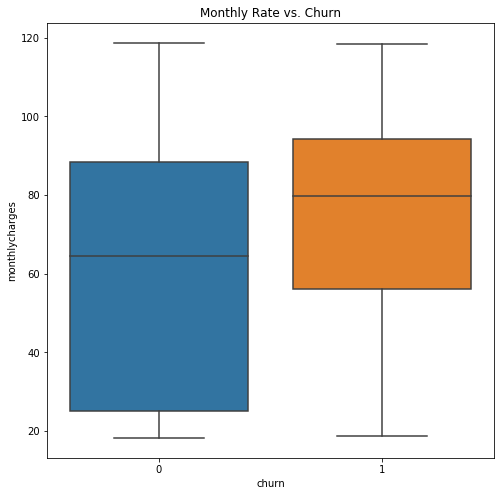

In [34]:
# Looking at the relationship between the monthly bill and whether or not they churned
plot1 = pd.concat([df['monthlycharges'], df['churn']], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x='churn', y='monthlycharges', data=plot1)
plt.title("Monthly Rate vs. Churn");
df.groupby('churn')[['monthlycharges']].describe()

## Looking at class imbalance

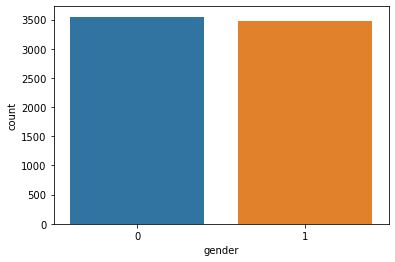

In [35]:
#gender: binary, male or female
sns.countplot(df['gender']);

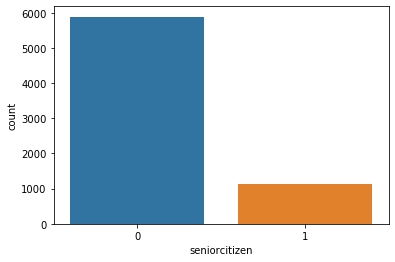

In [36]:
#SeniorCitizen: binary, 0 (no) or 1 (yes)
sns.countplot(df['seniorcitizen']);
# notes this is a class inbalance

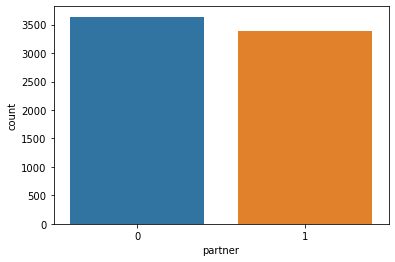

In [37]:
sns.countplot(df['partner']);
#looks good

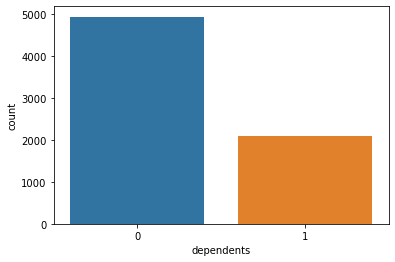

In [38]:
sns.countplot(df['dependents']);
# class inbalance

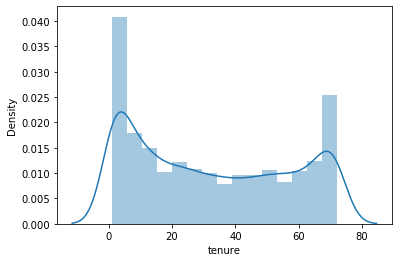

In [39]:
sns.distplot(df['tenure']);
# data looks relatively good. I am a little bit surprised that the shape
# is bimodal. I would have expected the longest tenure to be the least dense